# Apollo Hospitals - Hypothesis Testing

## About Apollo:

Apollo Hospitals was established in 1983, renowned as the architect of modern healthcare in India. As the nation's first corporate hospital, Apollo Hospitals is acclaimed for pioneering the private healthcare revolution in the country.


As a data scientist working at Apollo 24/7, the ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data.

You can help Apollo hospitals to be more efficient, to influence diagnostic and treatment processes, to map the spread of a pandemic.


One of the best examples of data scientists making a meaningful difference at a global level is in the response to the COVID-19 pandemic, where they have improved information collection, provided ongoing and accurate estimates of infection spread and health system demand, and assessed the effectiveness of government policies.

### Column Profiling

    Age: This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
    Sex: This is the policy holder's gender, either male or female.
    Viral Load: Viral load refers to the amount of virus in an infected person's blood
    Severity Level: This is an integer indicating how severe is the patient.
    Smoker: This is yes or no depending on whether the insured regularly smokes tobacco.
    Region: This is the beneficiary's place of residence in Delhi, divided into four geographic regions -northeast, southeast, southwest, or northwest
    Hospitalization charges: Individual medical costs billed to health insurance.

In [1]:
# Import the libraries:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, t, f
from scipy.stats import ttest_1samp, ttest_ind
from scipy.stats import ttest_ind_from_stats
from scipy.stats import chi2_contingency # Categorical Vs Categorical
from scipy.stats import f_oneway # Numeric Vs categorical
import statsmodels.api as sm
from scipy.stats import levene
from statsmodels.graphics.mosaicplot import mosaic

### 1.Definition of problem:
    
The company wants to know:

• Which variables are significant in predicting the reason for hospitalization for different regions

• How well some variables like viral load, smoking, Severity Level describe the hospitalization charges

### 2. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.

In [2]:
#Read the bike_sharing data
df = pd.read_csv('scaler_apollo_hospitals.csv')
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


### Observation:

    1. The first column looks unnecessary which can be deleted.
    2. The other features looks good.

In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
df

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...
1333,50,male,no,northwest,10.32,3,26501
1334,18,female,no,northeast,10.64,0,5515
1335,18,female,no,southeast,12.28,0,4075
1336,21,female,no,southwest,8.60,0,5020


#### Observation:
    
    The data looks cleaner now.

In [5]:
#Checking the shape of the data
df.shape

(1338, 7)

In [6]:
#Data type of all the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


#### Initial Observation:

1. There are no missing values in the data.
2. The categorical variables are of object type and numerical variables are of int type. So, we need not change the data type of the variables.
3. Severity level seems to be categorical data, we can change it's data type to object type.

In [7]:
df['severity level'] = df['severity level'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   object 
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 73.3+ KB


In [8]:
#Statistical summary of categorical and numerical attributes:
df.describe(include='all')

,age,sex,smoker,region,viral load,severity level,hospitalization charges
count,1338.000000,1338,1338,1338,1338.000000,1338.0,1338.000000
unique,NaN,2,2,4,NaN,6.0,NaN
top,NaN,male,no,southeast,NaN,0.0,NaN
freq,NaN,676,1064,364,NaN,574.0,NaN
mean,39.207025,NaN,NaN,NaN,10.221233,NaN,33176.058296
std,14.049960,NaN,NaN,NaN,2.032796,NaN,30275.029296
min,18.000000,NaN,NaN,NaN,5.320000,NaN,2805.000000
25%,27.000000,NaN,NaN,NaN,8.762500,NaN,11851.000000
50%,39.000000,NaN,NaN,NaN,10.130000,NaN,23455.000000
75%,51.000000,NaN,NaN,NaN,11.567500,NaN,41599.500000


#### Observations:

    1. We have patients data of smoker and non-smoker males and females spread across four regions.
    2. The mean and median for age, viral load are quite close; this suggests not much outliers in the data for these attributes. Also, the standard deviation is not very large; this suggests not much variance in the data.
    3. We do have some significant difference between mean and median for hospitalization charges. And since mean is greater than median we have right-tailed data for hospitalization charges. Also, high std implies high variation in the data.

In [9]:
#Checking missing values:
df.isnull().sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

#### Observation:

    There are no missing values in the data.

### 3.Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

In [10]:
category_cols=['sex','smoker','region','severity level']
df[category_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df[category_cols])*100

value
variable       value               
region         northeast  24.215247
               northwest  24.289985
               southeast  27.204783
               southwest  24.289985
severity level 0          42.899851
               1          24.215247
               2          17.937220
               3          11.733931
               4           1.868460
               5           1.345291
sex            female     49.476831
               male       50.523169
smoker         no         79.521674
               yes        20.478326

#### Observations:

    1. We have patients across all regions almost equally distributed.
    2. Male and female ratio is also not much different.
    3. Smokers category(20%) is significantly less than non-smokers(80%).
    4. We have most of the patients with less severity(0,1) and a very few percentage severe cases.

#### Univariate Analysis:

The distribution of the data for the quantitative attributes can be explored using histplot.

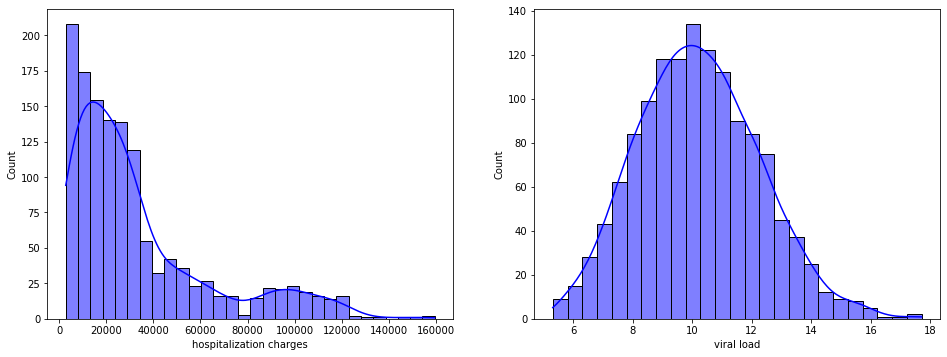

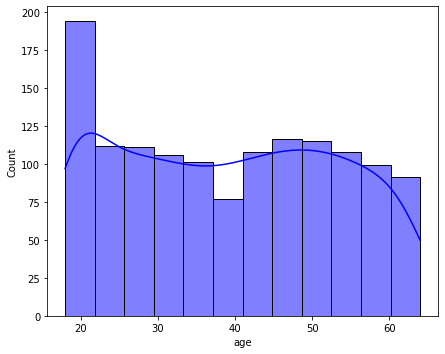

In [11]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="hospitalization charges", kde=True, ax=axis[0],color='blue')
sns.histplot(data=df, x="viral load", kde=True, ax=axis[1],color='blue')

plt.show()

fig, axis = plt.subplots(figsize=(7, 4))
fig.subplots_adjust(top=1.2)
sns.histplot(data=df, x="age", kde=True,color='blue')
plt.show()

#### Observation:

1. hospitalization charges is right-tailed and seems to follow log normal distrinution.
2. viral load and age seems to follow gaussian distribution.

#### Outliers detection using boxplot:

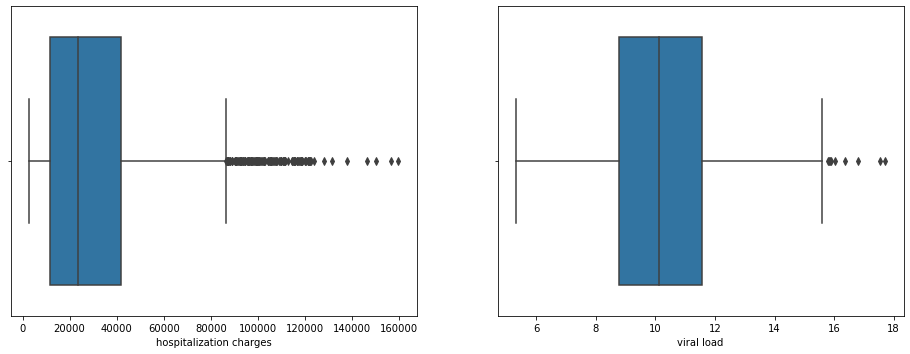

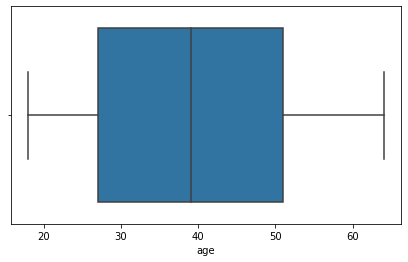

In [11]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="hospitalization charges", orient='h', ax=axis[0])
sns.boxplot(data=df, x="viral load", orient='h', ax=axis[1])
plt.show()

fig, axis = plt.subplots(figsize=(7, 4))
sns.boxplot(data=df, x="age", orient='h')
plt.show()

#### Observation:

    1. We can see quite a lot outliers in the hospitalization charges data.
    2. The viral load also have few outliers. All of those outliers are towards the right.
    3. Age does not have any outliers. The patient age is spread across late twenties to early fifties.

#### Countplots of Categorical features:

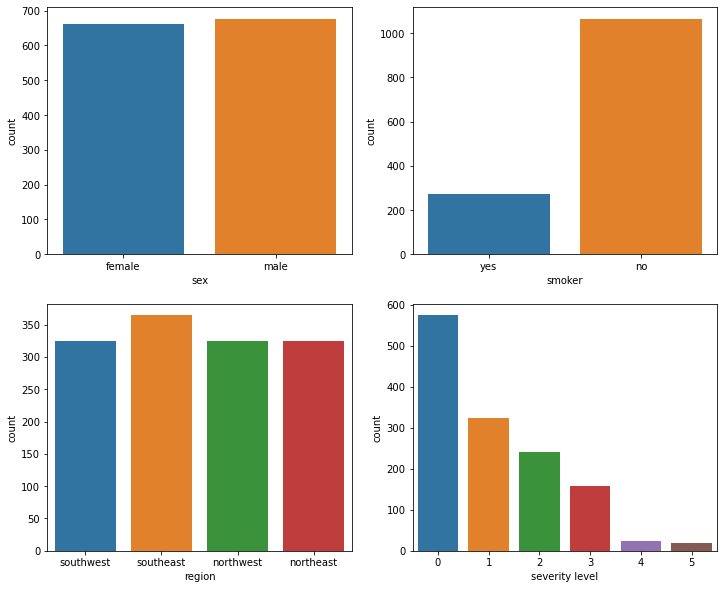

In [13]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=category_cols[index], ax=axis[row, col])
        index += 1
        
plt.show()

#### Observations:

    1. We have patients across all regions almost equally distributed with southeast being little higher(350+) than the others.
    2. Male and female patients count is not much different.
    3. Smokers category(~200) is significantly less than non-smokers(~1000).
    4. We have most of the patients with least severity(~600) and a very few severe cases patients.

### 4. Bivariate Analysis (Relationships between important variables such as hospitalization charges with region, smoker, viral load etc)

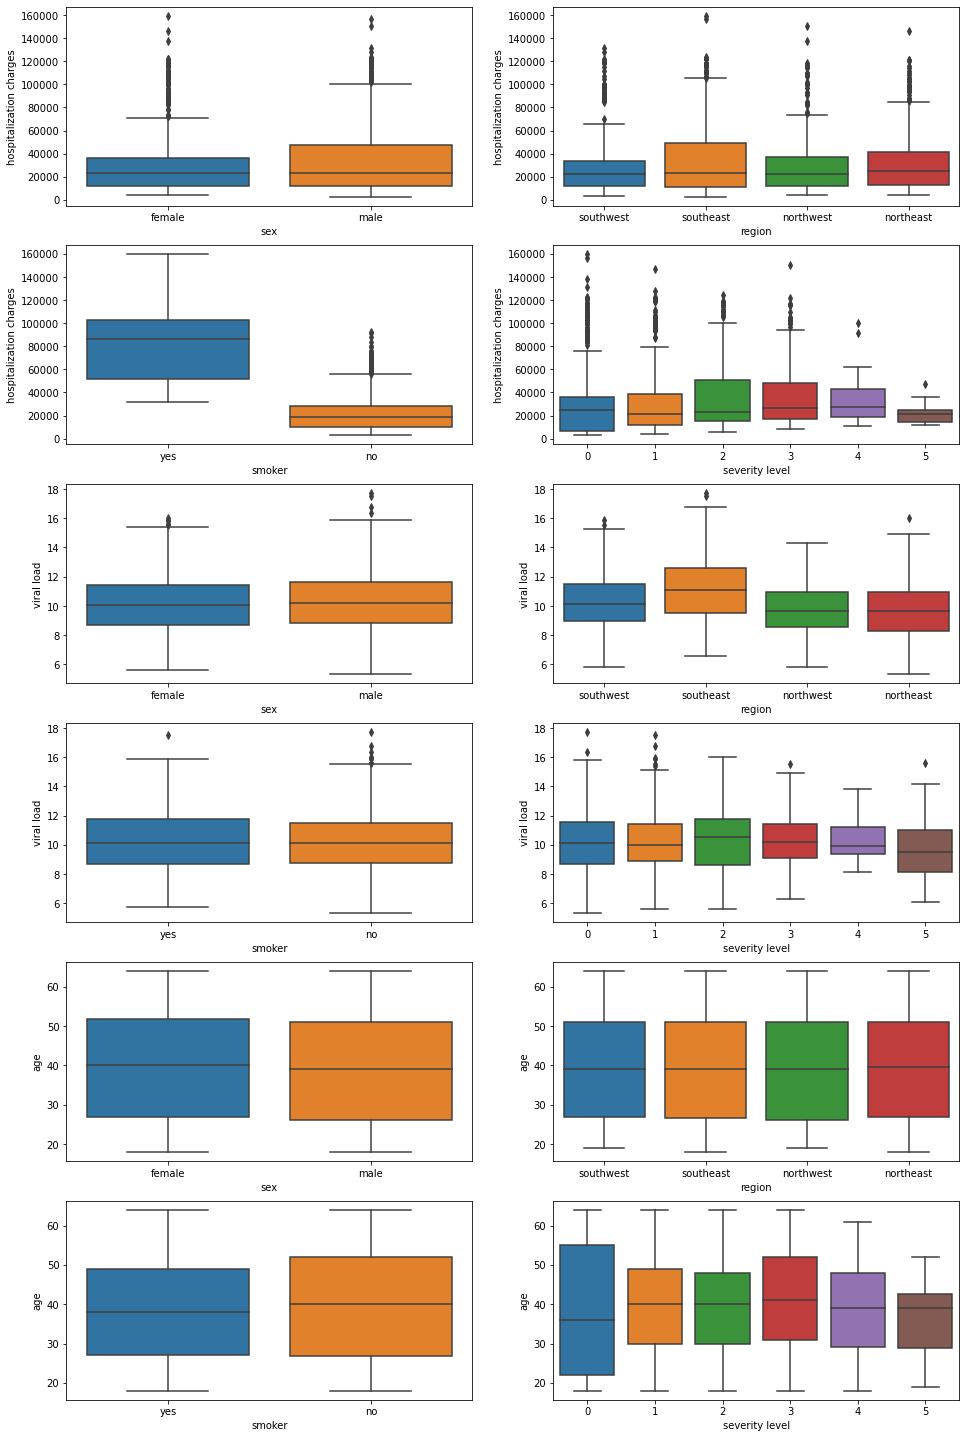

In [14]:
# Boxplot showing relation of categorical attributes with hospitalization charges, viral load.

fig, axis = plt.subplots(nrows=6, ncols=2, figsize=(16, 18))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="sex", y='hospitalization charges', ax=axis[0,0])
sns.boxplot(data=df, x="region", y='hospitalization charges', ax=axis[0,1])
sns.boxplot(data=df, x="smoker", y='hospitalization charges', ax=axis[1,0])
sns.boxplot(data=df, x="severity level", y='hospitalization charges', ax=axis[1,1])

sns.boxplot(data=df, x="sex", y='viral load', ax=axis[2,0])
sns.boxplot(data=df, x="region", y='viral load', ax=axis[2,1])
sns.boxplot(data=df, x="smoker", y='viral load', ax=axis[3,0])
sns.boxplot(data=df, x="severity level", y='viral load', ax=axis[3,1])

sns.boxplot(data=df, x="sex", y='age', ax=axis[4,0])
sns.boxplot(data=df, x="region", y='age', ax=axis[4,1])
sns.boxplot(data=df, x="smoker", y='age', ax=axis[5,0])
sns.boxplot(data=df, x="severity level", y='age', ax=axis[5,1])

plt.show()

#### Observations:

    1. There is a bit of difference in hospitalizations charges for male and females with male hospitalizations charges are little higher. However, we have more outliers for females.
    2. Hospitalization charges across different have little variations with southeast being exception with little higher hospitalization charges.
    3. Hospitalization charges for smokers are much higher than that of non smokers.
    4. Severity level does seem to have some effect on hospitalization charges as there are little variation among different severity levels.
    5. For viral load, not much difference between men and women. There are little more outliers for males than females.
    6. Viral load doesn't seem to have much difference across regions with south east being exception with little higher viral load.
    7. Viral load does not have much difference between smoker and non-smoker category.Also, across severity level it has not much difference.
    8. Males and females patient both have almost same age category. Also, across region we do not have much variation in age of the patients.
    9. Smokers patients are relatively little young than non-smoker patients. 
    10. Severity level varies a bit across different aged patients. Patient age have more variance for patient with zero severity level.

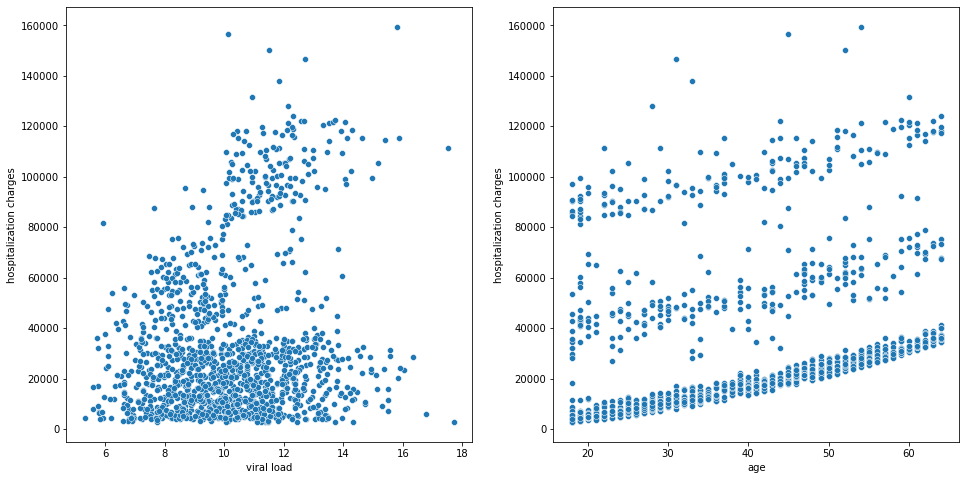

In [15]:
# plotting numerical variables againt hospitalization charges using scatterplot

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

sns.scatterplot(data=df, x='viral load', y='hospitalization charges', ax=axis[0])
sns.scatterplot(data=df, x='age', y='hospitalization charges', ax=axis[1])
        
plt.show()

#### Observations:

    1. We have some cases wherein higher viral load has high hospitalization charges, but we can't say conclusively from the scatter plot that high viral load is causing high high hospitalization charges.
    2. The scatter plot for hospitalization charges and age looks little linear at some places. There seems to be little higher hospitalization charges for aged patients.

#### Correlation among differnt numerical factors:

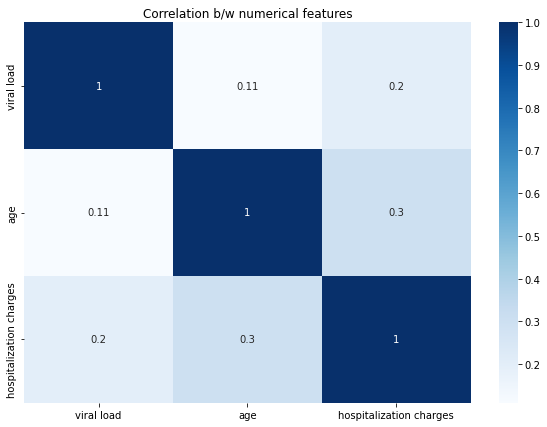

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(df[['viral load', 'age', 'hospitalization charges']].corr(), annot = True, cmap = 'Blues')

plt.title("Correlation b/w numerical features")
plt.show()

#### Observation:

    1. There is very little correlation between numerical attributes as can be seen from the above correlation plot. The hospitalization charges relation with age is the highest(0.3).

In [17]:
df.corr()['hospitalization charges']

age                        0.299008
viral load                 0.198388
hospitalization charges    1.000000
Name: hospitalization charges, dtype: float64

#### Observation:

1. Age is slightly more correlated with hospitalization charges than viral load.

#### Bivariate analysis for categorical features: (Smokers across region and severity level across Smokers/Non-smokers)

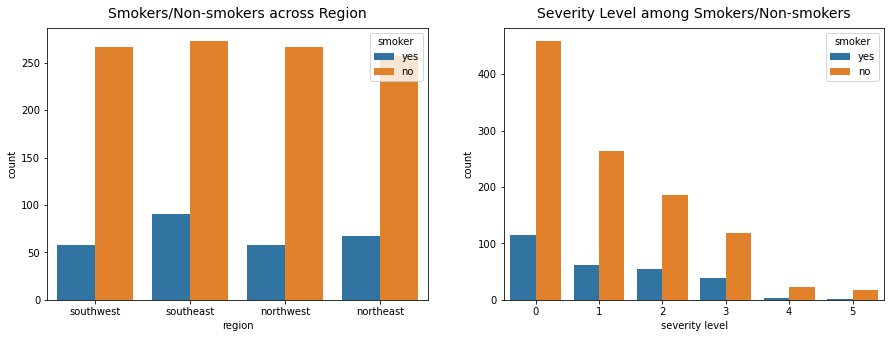

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.countplot(data=df, x='region', hue="smoker", ax=axs[0])
sns.countplot(data=df, x='severity level', hue="smoker",ax=axs[1])

axs[0].set_title("Smokers/Non-smokers across Region", pad=10, fontsize=14)
axs[1].set_title("Severity Level among Smokers/Non-smokers", pad=10, fontsize=14)

plt.show()

#### Observation:

    1. There is slightly higher smokers in the southeast region.We will have to see if this difference is statistically different. Non-smokers are almost equal across regions.
    2. Smokers/non-smokers are not same across diferent severity level.

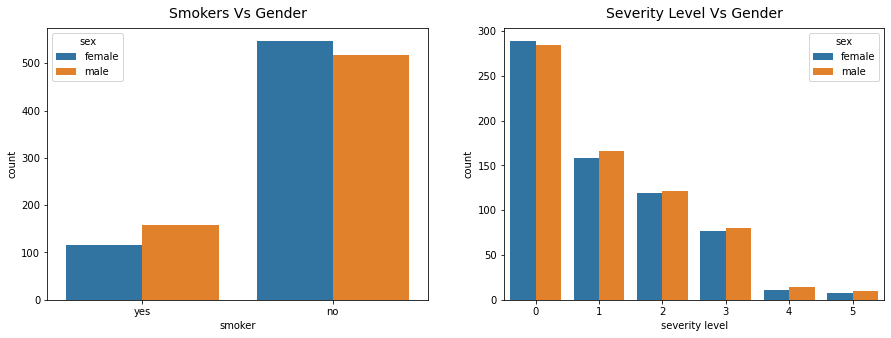

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.countplot(data=df, x='smoker', hue="sex", ax=axs[0])
sns.countplot(data=df, x='severity level', hue="sex",ax=axs[1])

axs[0].set_title("Smokers Vs Gender", pad=10, fontsize=14)
axs[1].set_title("Severity Level Vs Gender", pad=10, fontsize=14)

plt.show()

#### Observations:

    1. Male smokers are little higher than female smokers. And non-smokers count for female is slightly higher.
    2. Severity level for males and females doesn't vary much.

#### Multivariate Analysis:

<AxesSubplot:xlabel='sex', ylabel='hospitalization charges'>

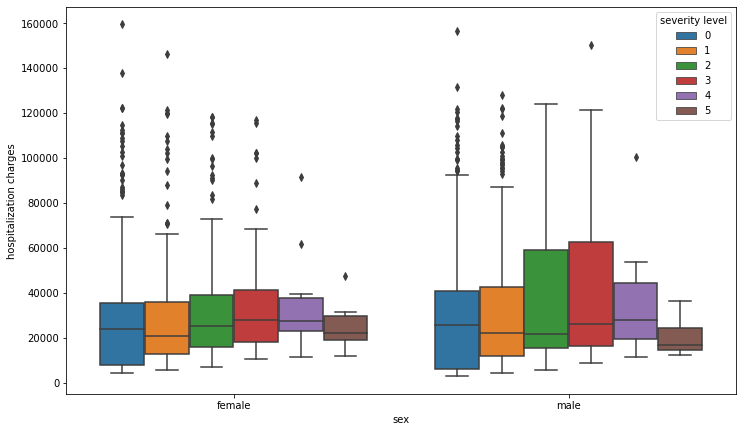

In [4]:
fig, axis = plt.subplots(figsize=(12, 5))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="sex", y='hospitalization charges', hue='severity level')

#### Observation:

We can see hospitalization charges for male are more and charges basis severity level seems to have more prominent for males than females with severity level 2 and 3 has quite higher hospitalization charges for males.

<AxesSubplot:xlabel='sex', ylabel='hospitalization charges'>

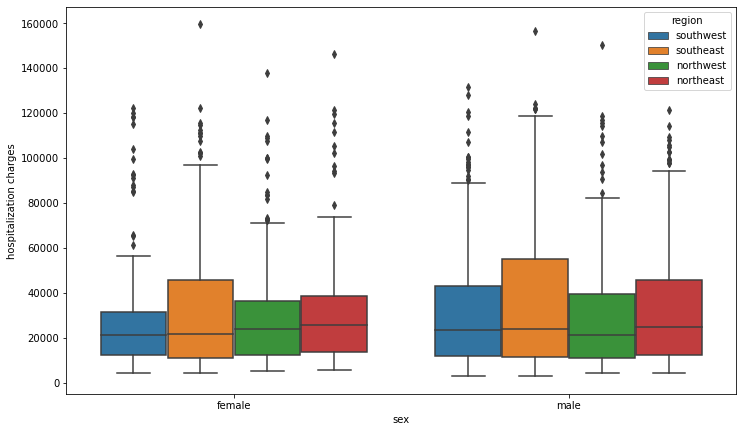

In [5]:
fig, axis = plt.subplots(figsize=(12, 5))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="sex", y='hospitalization charges', hue='region')

#### Observation: 

We can see hospitalization charges are more in the southeast region for both males and females. Second most hospitalization charges is northeast for both males and females. But the least charges is southwest for females but northwest for males. So, there seems to be some difference in hospitalization charges basis region.  

<AxesSubplot:xlabel='sex', ylabel='viral load'>

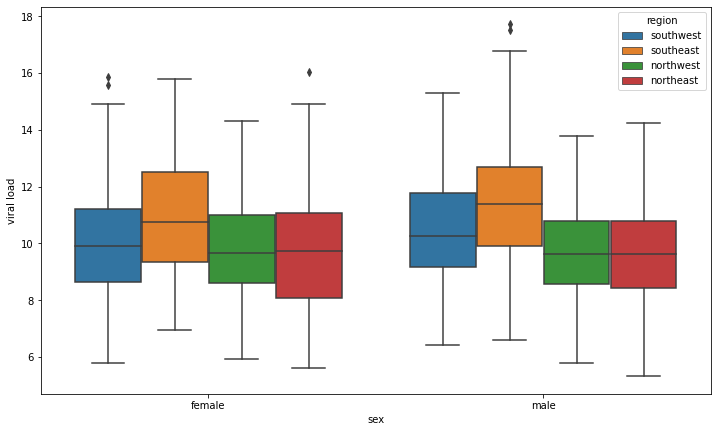

In [6]:
fig, axis = plt.subplots(figsize=(12, 5))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="sex", y='viral load', hue='region')

<AxesSubplot:xlabel='sex', ylabel='hospitalization charges'>

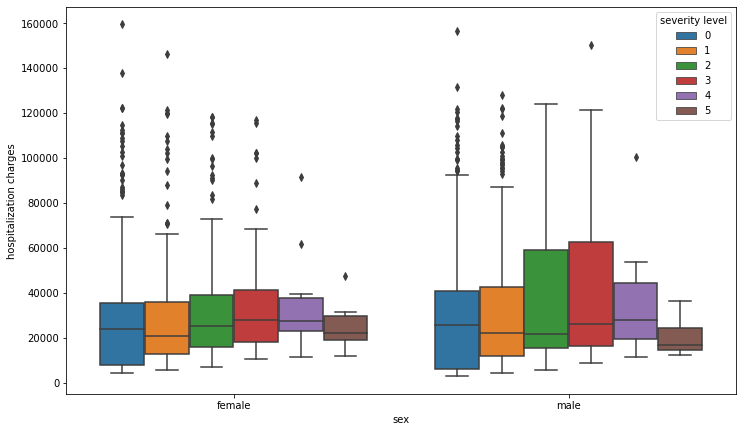

In [10]:
fig, axis = plt.subplots(figsize=(12, 5))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="sex", y='hospitalization charges', hue='severity level')

#### Observation:

Hospitalization charges for males vary much according to severity level than females. As we can see severity level 2 and 3 have more hospitalization charges for males.

#### Observation:

Viral load impact in the different region for males and females looks similar.

<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

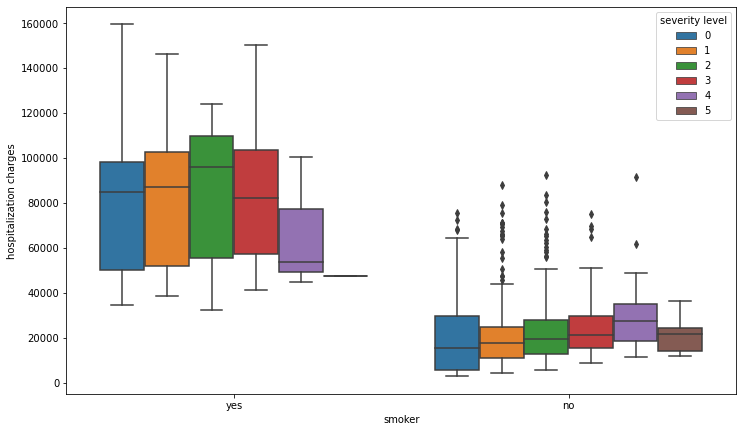

In [7]:
fig, axis = plt.subplots(figsize=(12, 5))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="smoker", y='hospitalization charges', hue='severity level')

#### Observation:

For smokers severity level 2 seems to affected most and for nonsmokers severity level 4 seems to be affected most.

<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

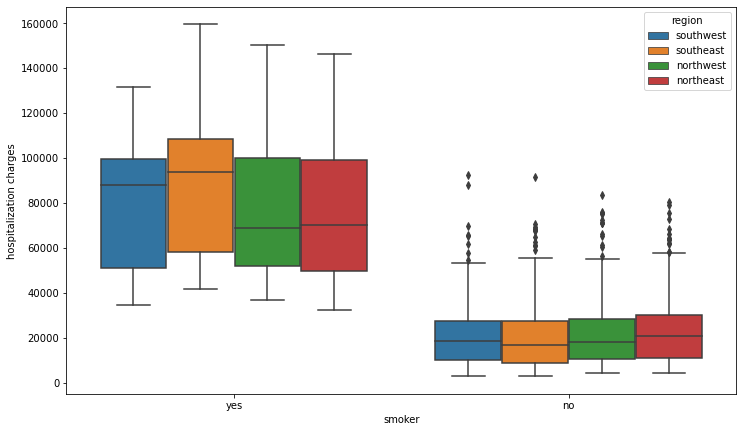

In [8]:
fig, axis = plt.subplots(figsize=(12, 5))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="smoker", y='hospitalization charges', hue='region')

#### Observation:
    
    Hospitalization charges seems to vary across regions for smokers a little more than for non-smokers. As we can see for smokers southeast region has slight higher hospitalization charges than other three regions whereas for non-smokers for all the regions charges are almost similar.

<AxesSubplot:xlabel='smoker', ylabel='viral load'>

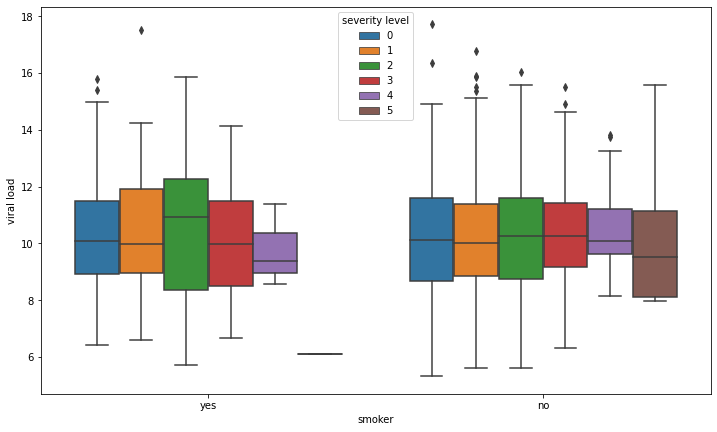

In [9]:
fig, axis = plt.subplots(figsize=(12, 5))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="smoker", y='viral load', hue='severity level')

#### Observation:

For smokers viral load seems to vary more according to the severity level than non-smokers. For severity level 2 smokers seems to have distinctively higher viral load.

### 5. Illustrate the insights based on EDA

    Comments on range of attributes, outliers of various attributes
    Comments on the distribution of the variables and relationship between them
    Comments for each univariate and bivariate plots

#### Summarized Insight based on EDA:
    
    1. We have patients across all regions almost equally distributed with southeast region have little higher number of patients.
    2. Male and female patients count is also not much different.
    3. Smokers category(20%) is significantly less than non-smokers(80%).
    4. We have most of the patients with severity 0(43%), severity 1(24%), severity 3(11%) and a very few percentage for severity 4(1.9%) and severity 5(1.3%) cases.
    5. We can see quite a lot outliers in the hospitalization charges data.
    6. The viral load also have few outliers. All of those outliers are towards the right.
    7. Age does not have any outliers. The patient age is spread mostly across late twenties to early fifties.
    8. There is a bit of difference in hospitalizations charges for male and females with male hospitalizations charges are little higher. However, we have more outliers for females.
    9. Hospitalization charges across different regions have little variations with southeast being exception with little higher hospitalization charges.
    10. Hospitalization charges for smokers are much higher than that of non smokers.
    11. Severity level does seem to have some effect on hospitalization charges as there are little variation found among different severity levels.
    12. For viral load, not much difference between men and women. There are little more outliers for males than females.
    13. Viral load doesn't seem to have much difference across regions with south east being exception with little higher viral load. 
    14. Viral load does not have much difference between smoker and non-smoker category.Also, across severity level it has not much difference. Although, some outliers for viral load can be seen for severity level 0 and 1.
    15. Males and females patient both have almost same age category. Also, across region we do not have much variation in age of the patients.
    16. Smokers patients are relatively little young than non-smoker patients. 
    17. Severity level varies a bit across different aged patients. Patient age have more variance for patient with zero severity level.

#### Missing values treatment & Outlier treatment:

We have seen above there is no missing data for any attributes. So, it doesn't require any missing value treatment. But, we do have quite some outliers for hospitalization charges. 

We may remove the outliers with zscore > 3 (region outside of 99% of population) and zscore > 2(region outside of 97.5% of population).

In [20]:
z_scores = np.abs(stats.zscore(df['hospitalization charges']))
z_scores.head()

0    0.298573
1    0.953685
2    0.728663
3    0.719837
4    0.776807
Name: hospitalization charges, dtype: float64

In [21]:
#converting numpy series to panda dataframe for merging with original data
z_scores=pd.DataFrame({'z_scores': z_scores})

In [22]:
merged_df = pd.concat([df, z_scores], axis=1)

In [23]:
# Remove outliers with z-score > 3 i.e. beyond 99% of population
threshold = 3
clean_data3 = merged_df[(z_scores < threshold).all(axis=1)]
clean_data3

,age,sex,smoker,region,viral load,severity level,hospitalization charges,z_scores
0,19,female,yes,southwest,9.30,0,42212,0.298573
1,18,male,no,southeast,11.26,1,4314,0.953685
2,28,male,no,southeast,11.00,3,11124,0.728663
3,33,male,no,northwest,7.57,0,54961,0.719837
4,32,male,no,northwest,9.63,0,9667,0.776807
...,...,...,...,...,...,...,...,...
1333,50,male,no,northwest,10.32,3,26501,0.220563
1334,18,female,no,northeast,10.64,0,5515,0.914001
1335,18,female,no,southeast,12.28,0,4075,0.961583
1336,21,female,no,southwest,8.60,0,5020,0.930357


#### Univariate and Bivariate analysis after removal of outliers 

#### Case I: After removal of 3 standard deviation hospitalization charges data points

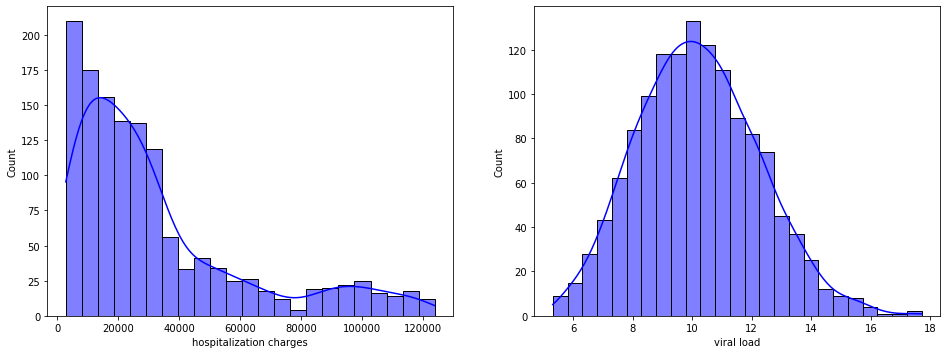

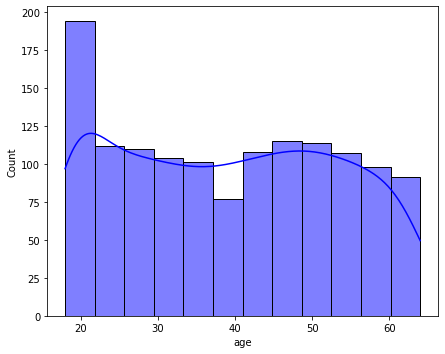

In [24]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
fig.subplots_adjust(top=1.2)

sns.histplot(data=clean_data3, x="hospitalization charges", kde=True, ax=axis[0],color='blue')
sns.histplot(data=clean_data3, x="viral load", kde=True, ax=axis[1],color='blue')

plt.show()

fig, axis = plt.subplots(figsize=(7, 4))
fig.subplots_adjust(top=1.2)
sns.histplot(data=clean_data3, x="age", kde=True,color='blue')
plt.show()

In [25]:
#Statistical summary of categorical and numerical attributes:
clean_data3.describe(include='all')

,age,sex,smoker,region,viral load,severity level,hospitalization charges,z_scores
count,1331.000000,1331,1331,1331,1331.000000,1331.0,1331.000000,1331.000000
unique,NaN,2,2,4,NaN,6.0,NaN,NaN
top,NaN,male,no,southeast,NaN,0.0,NaN,NaN
freq,NaN,672,1064,362,NaN,570.0,NaN,NaN
mean,39.185575,NaN,NaN,NaN,10.211112,NaN,32591.942149,0.735641
std,14.058021,NaN,NaN,NaN,2.029670,NaN,29248.403334,0.626758
min,18.000000,NaN,NaN,NaN,5.320000,NaN,2805.000000,0.003438
25%,26.000000,NaN,NaN,NaN,8.740000,NaN,11799.000000,0.314963
50%,39.000000,NaN,NaN,NaN,10.100000,NaN,23255.000000,0.622959
75%,51.000000,NaN,NaN,NaN,11.530000,NaN,40898.000000,0.910135


#### Case I: After removal of 2 standard deviation hospitalization charges data points

In [26]:
threshold = 2
clean_data2 = merged_df[(z_scores < threshold).all(axis=1)]
clean_data2

,age,sex,smoker,region,viral load,severity level,hospitalization charges,z_scores
0,19,female,yes,southwest,9.30,0,42212,0.298573
1,18,male,no,southeast,11.26,1,4314,0.953685
2,28,male,no,southeast,11.00,3,11124,0.728663
3,33,male,no,northwest,7.57,0,54961,0.719837
4,32,male,no,northwest,9.63,0,9667,0.776807
...,...,...,...,...,...,...,...,...
1333,50,male,no,northwest,10.32,3,26501,0.220563
1334,18,female,no,northeast,10.64,0,5515,0.914001
1335,18,female,no,southeast,12.28,0,4075,0.961583
1336,21,female,no,southwest,8.60,0,5020,0.930357


In [27]:
#Statistical summary of categorical and numerical attributes:
clean_data2.describe(include='all')

,age,sex,smoker,region,viral load,severity level,hospitalization charges,z_scores
count,1230.000000,1230,1230,1230,1230.000000,1230.0,1230.000000,1230.000000
unique,NaN,2,2,4,NaN,6.0,NaN,NaN
top,NaN,female,no,southeast,NaN,0.0,NaN,NaN
freq,NaN,624,1064,318,NaN,541.0,NaN,NaN
mean,38.721138,NaN,NaN,NaN,10.058106,NaN,26463.320325,0.595125
std,14.110725,NaN,NaN,NaN,1.991990,NaN,20595.655790,0.397380
min,18.000000,NaN,NaN,NaN,5.320000,NaN,2805.000000,0.003438
25%,26.000000,NaN,NaN,NaN,8.610000,NaN,11127.000000,0.287822
50%,39.000000,NaN,NaN,NaN,9.940000,NaN,21385.000000,0.571049
75%,51.000000,NaN,NaN,NaN,11.300000,NaN,33531.750000,0.844396


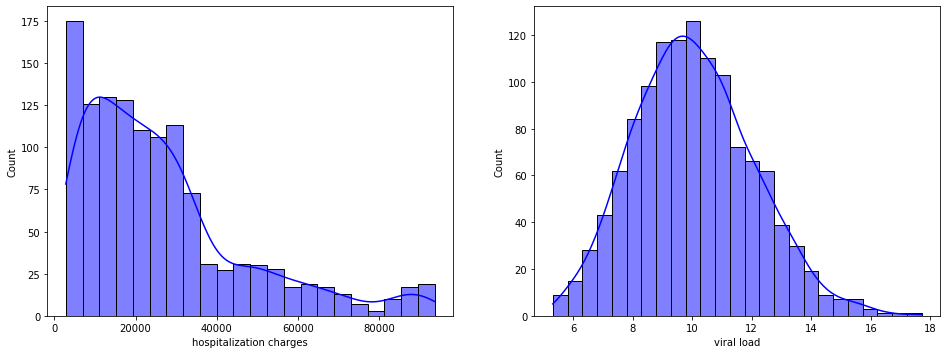

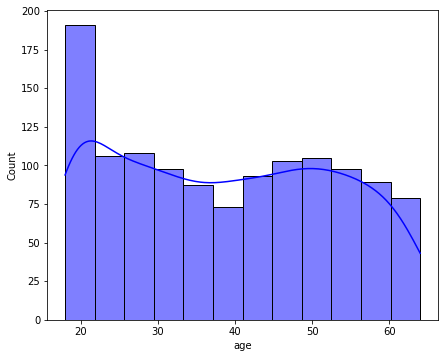

In [28]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
fig.subplots_adjust(top=1.2)

sns.histplot(data=clean_data2, x="hospitalization charges", kde=True, ax=axis[0],color='blue')
sns.histplot(data=clean_data2, x="viral load", kde=True, ax=axis[1],color='blue')

plt.show()

fig, axis = plt.subplots(figsize=(7, 4))
fig.subplots_adjust(top=1.2)
sns.histplot(data=clean_data2, x="age", kde=True,color='blue')
plt.show()

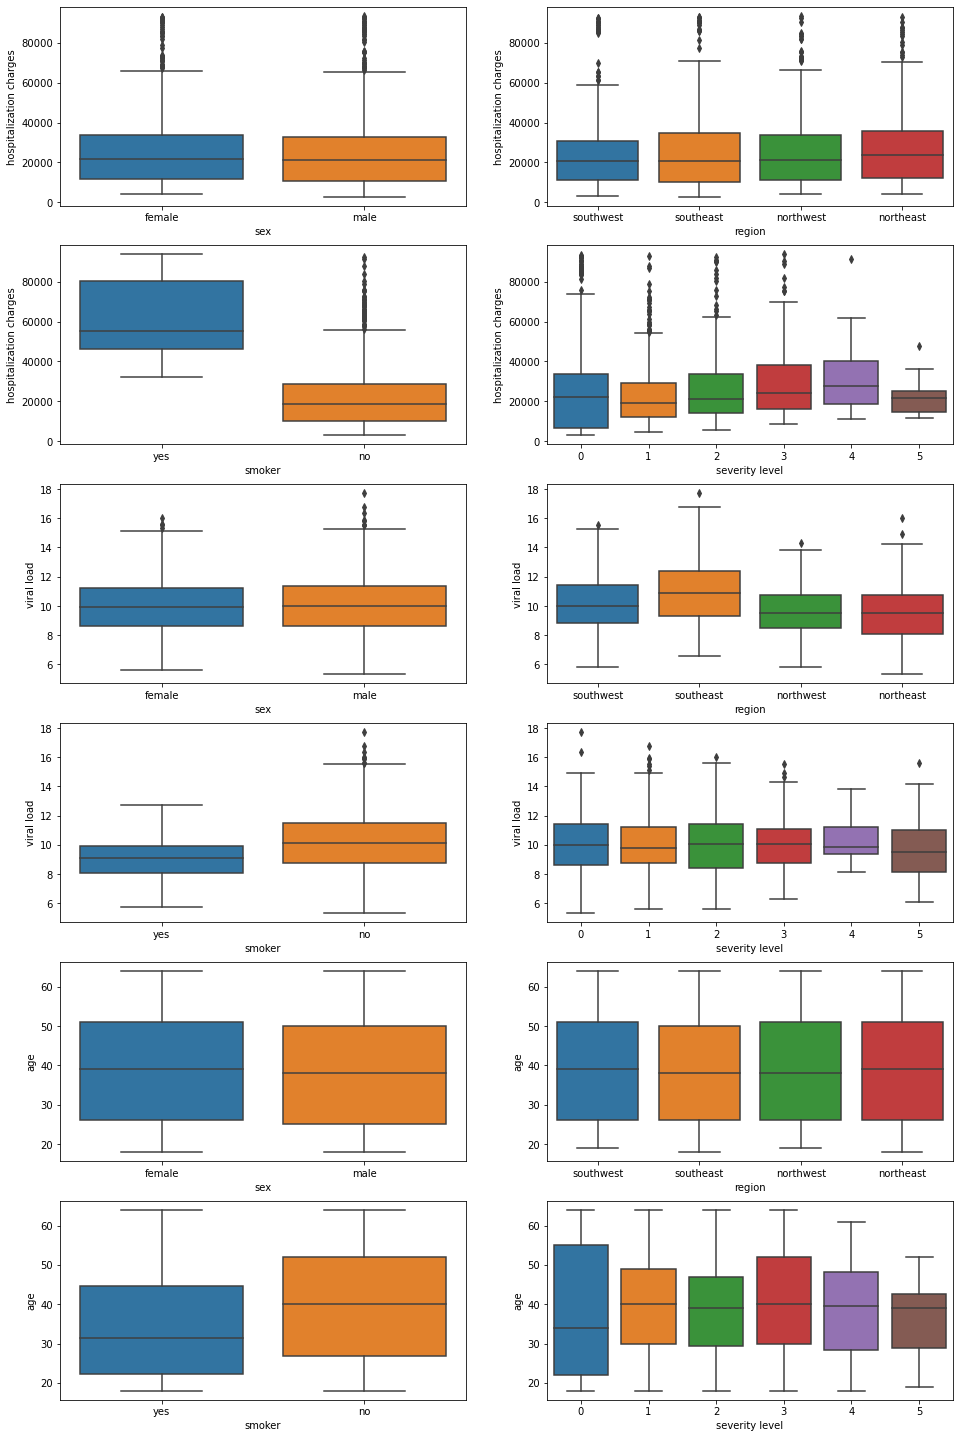

In [29]:
# Boxplot showing relation of categorical attributes with hospitalization charges, viral load after removing outliers.

fig, axis = plt.subplots(nrows=6, ncols=2, figsize=(16, 18))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=clean_data2, x="sex", y='hospitalization charges', ax=axis[0,0])
sns.boxplot(data=clean_data2, x="region", y='hospitalization charges', ax=axis[0,1])
sns.boxplot(data=clean_data2, x="smoker", y='hospitalization charges', ax=axis[1,0])
sns.boxplot(data=clean_data2, x="severity level", y='hospitalization charges', ax=axis[1,1])

sns.boxplot(data=clean_data2, x="sex", y='viral load', ax=axis[2,0])
sns.boxplot(data=clean_data2, x="region", y='viral load', ax=axis[2,1])
sns.boxplot(data=clean_data2, x="smoker", y='viral load', ax=axis[3,0])
sns.boxplot(data=clean_data2, x="severity level", y='viral load', ax=axis[3,1])

sns.boxplot(data=clean_data2, x="sex", y='age', ax=axis[4,0])
sns.boxplot(data=clean_data2, x="region", y='age', ax=axis[4,1])
sns.boxplot(data=clean_data2, x="smoker", y='age', ax=axis[5,0])
sns.boxplot(data=clean_data2, x="severity level", y='age', ax=axis[5,1])

plt.show()

#### Observation: 
    
    We can see from the box plot that the hospitalization charge for males and females are more closer after removal of outliers.
    Hospital charges across regions also is more closer after removal of outlier.
    Also, hospitalization charges are now more closer for smoker and non-smoker after removal of outliers.

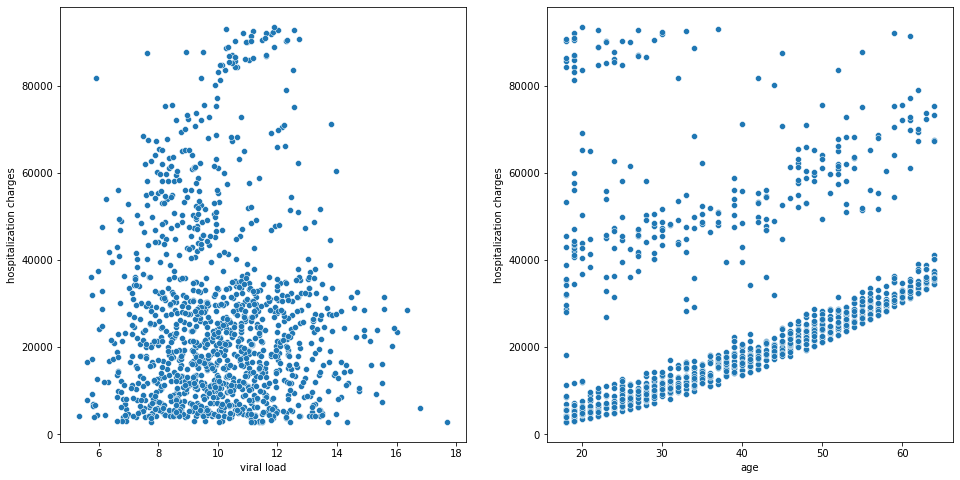

In [30]:
# plotting numerical variables againt hospitalization charges using scatterplot

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

sns.scatterplot(data=clean_data2, x='viral load', y='hospitalization charges', ax=axis[0])
sns.scatterplot(data=clean_data2, x='age', y='hospitalization charges', ax=axis[1])
        
plt.show()

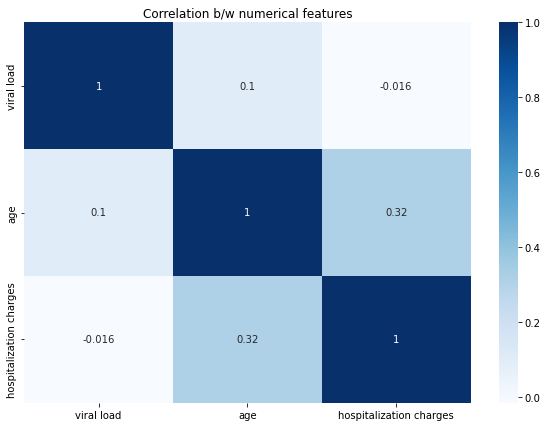

In [31]:
# Correlation after removal of outliers
plt.figure(figsize=(10,7))
sns.heatmap(clean_data2[['viral load', 'age', 'hospitalization charges']].corr(), annot = True, cmap = 'Blues')

plt.title("Correlation b/w numerical features")
plt.show()

#### Observation:

    1. We can see the correlation between age and hospitalization charges has increased after removal of outliers.
    2. The correlation between viral load and hospitalization charges got changed drastically from 0.2 to -0.016. There doesn't seem to be any significant correlation between the two. 

### Hypothesis Testing

### Test1: Prove (or disprove) that the hospitalization charges of people who do smoking are greater than those who don't?

#### Null Hypothesis:  
Smoking/No smoking does not affect people getting hospitalized.

#### Alternate Hypothesis: 
chances of hospitalization increases with smoking.

#### Significance level:
0.05

#### Check assumptions of test:

We have already seen the data is normally distributed; we can check normality for the smokers and non-smokers using Q-Q plot. Also, we can check equal variance test. To check normality and equal variance first filter the non-smoking and smoking data:

After filtering we can normality of data using Q_Q plot and variance of the two data groups.If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

In [59]:
nonsmoking = df[df['smoker']=='no']['hospitalization charges'].values
smoking = df[df['smoker']=='yes']['hospitalization charges'].values

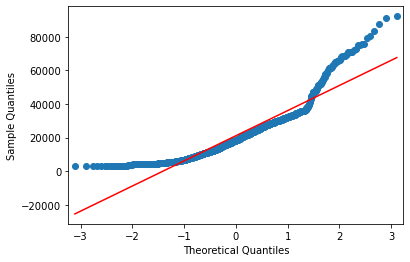

In [51]:
# create a Q-Q plot to check normality for non-smoker group:
sm.qqplot(nonsmoking, line='s')
plt.show()

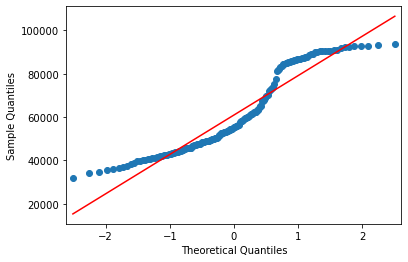

In [52]:
# create a Q-Q plot to check normality for smoker group:
sm.qqplot(smoking, line='s')
plt.show()

#### Observation:

We can see the data plots although not very closely along the straight line, but it's also not very far from the straight line. We can assume the data to follow normal distribution.

#### Variance test

In [33]:
np.var(smoking), np.var(nonsmoking)

(829508540.9016064, 224322878.53678045)

In [34]:
np.var(smoking)/np.var(nonsmoking)

3.697832991054448

Since the ratio of larger sample variance to smaller variance is less than 4, we can assume variance are equal for both groups.

In [69]:
#Equal variance test through levene's test
levene_pvalue = levene(smoking, nonsmoking)
levene_pvalue

LeveneResult(statistic=332.6132009308764, pvalue=1.5595259401311176e-66)

#### Observation:

Levene's test result shows the variance are not equal.

In [70]:
#find the length, mean, and standard deviation of the smokers data
n1=smoking.shape[0]
mu1=smoking.mean()
std1=smoking.std()

In [36]:
#find the length, mean, and standard deviation of the nonsmokers data
n2=nonsmoking.shape[0]
mu2=nonsmoking.mean()
std2=nonsmoking.std()

#### Select the appropriate test:

##### T-test Right tailed

In [71]:
ttest_ind_from_stats(mu1,std1,n1,mu2,std2,n2,equal_var=False,alternative='greater')

Ttest_indResult(statistic=32.808889581430016, pvalue=1.8597282229163057e-103)

In [72]:
critical_value=t.ppf(0.95,df=min(n1-1,n2-1))
critical_value

1.6504543030215924

#### Conclusion:

Since the tstat is greater than critical value and p-value is much lower than alpha(0.05), the test result is statistically significant to reject the null hypothesis. Hence, we can say the test result indicates smokers hospitalization charges is higher than nonsmokers.

#### What if we repeat the same test for clean data obtained after removal of outliers?

In [80]:
nonsmoking = clean_data2[clean_data2['smoker']=='no']['hospitalization charges'].values
smoking = clean_data2[clean_data2['smoker']=='yes']['hospitalization charges'].values

In [81]:
#Equal variance test through levene's test
levene_pvalue = levene(smoking, nonsmoking)
levene_pvalue

LeveneResult(statistic=20.780326548956904, pvalue=5.665275065947769e-06)

In [73]:
np.var(smoking)/np.var(nonsmoking)
n1=smoking.shape[0]
mu1=smoking.mean()
std1=smoking.std()
n2=nonsmoking.shape[0]
mu2=nonsmoking.mean()
std2=nonsmoking.std()
critical_value=t.ppf(0.95,df=min(n1-1,n2-1))
ttest_ind_from_stats(mu1,std1,n1,mu2,std2,n2,equal_var=False,alternative='greater')

Ttest_indResult(statistic=30.924049742998648, pvalue=4.6298583405518307e-156)

#### Conclusion:

We can clearly see the tstat is greater than critical value and p-value is much lower than alpha(0.05). Hence, we can reject the null hypothesis. The test is statistically proves that smokers hospitalization charges is higher than nonsmokers. 

### Test2: Prove (or disprove) with statistical evidence that the viral load of females is different from that of males

#### Null Hypothesis:
Viral load of females and males are same.

#### Alternate Hypothesis:
Viral load of females is different than that of males.

#### Significance level:
0.05

#### Check assumptions of test:
We have already seen the data is coming normally distributed population; still we can check normality of the groups using Q-Q plot. Also, we can do equal variance test. To check normality and equal variance first filter the non-smoking and smoking data:

After filtering check the variance of two data groups.If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

In [77]:
females = df[df['sex']=='female']['viral load'].values
males = df[df['sex']=='male']['viral load'].values

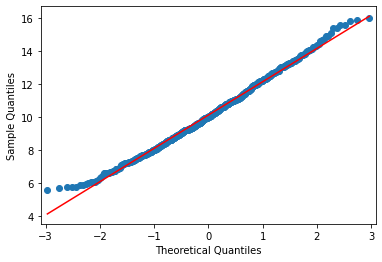

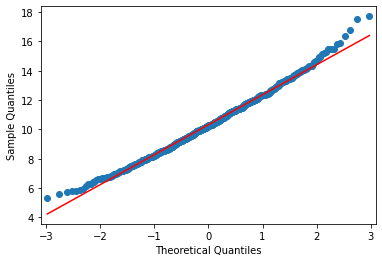

In [57]:
# create a Q-Q plot to check normality for males and females for viral load:
sm.qqplot(females, line='s')
plt.show()

sm.qqplot(males, line='s')
plt.show()

#### Observation:

From the graph we can observe the data plots fall very closely with the straight line. Hence, the assumtion of normality holds true.

In [41]:
#Variance Test
np.var(females), np.var(males)

(4.055708441872564, 4.18355750739645)

In [79]:
#Equal variance test through levene's test
levene_pvalue = levene(females, males)
levene_pvalue

LeveneResult(statistic=0.0038754151966871046, pvalue=0.9503708012456551)

Observation: The variance is clearly less than 4:1 for larger variance to smaller variance. Also, levene's test result has high p-value indicating equal varianvce.Hence, the equality of variance assumtion holds true.

In [42]:
#find the length, mean, and standard deviation of viral load for females and males
n1=females.shape[0]
mu1=females.mean()
std1=females.std()

n2=males.shape[0]
mu2=males.mean()
std2=males.std()

#### Select the appropriate test:

##### T-test Two tailed

In [43]:
ttest_ind_from_stats(mu1,std1,n1,mu2,std2,n2)

Ttest_indResult(statistic=-1.6969797284761319, pvalue=0.0899334158366348)

In [44]:
critical_value=t.ppf(0.95,df=min(n1-1,n2-1))
critical_value

1.6471621291696419

#### Conclusion:

Since the p-value is > than alpha(0.05), we cannot say test is statiscally significant to reject the null hypothesis. Hence, we fail to reject the null hypothesis that viral load among males and females is different.

#### What if we repeat the same test for clean data obtained after removal of outliers?

In [45]:
females = clean_data2[clean_data2['sex']=='female']['viral load'].values
males = clean_data2[clean_data2['sex']=='male']['viral load'].values
np.var(males)/np.var(females)
n1=females.shape[0]
mu1=females.mean()
std1=females.std()
n2=males.shape[0]
mu2=males.mean()
std2=males.std()
critical_value=t.ppf(0.95,df=min(n1-1,n2-1))
ttest_ind_from_stats(mu1,std1,n1,mu2,std2,n2)

Ttest_indResult(statistic=-1.0914688264478016, pvalue=0.27528074051921747)

#### Conclusion:
Since the p-value is even greater than what we found for data with outliers. Hence, we fail to reject the null hypothesis that viral load among males and females is different. It means the viral load of females is statistically not differnt than of males.

### Test 3: Is the proportion of smoking significantly different across different regions?

#### Null Hypothesis (H0): 
Number of smokers are same across different regions.

#### Alternate Hypothesis (H1): 
Number of smokers differ across different regions.

#### Significance level (alpha):
0.05

#### Assumption for the test:

Independence: The observations in each category of the contingency table should be independent of each other.

Sample size: The expected frequency count for each cell in the contingency table should be at least 5. If the expected frequency count for any cell is less than 5, then the chi-square test may not be valid and alternative tests may need to be considered.

Categorical data: The data being analyzed should be categorical in nature. The chi-square test is designed to test the association between two categorical variables.

#### Select the appropriate Test:

##### Chi-square

In [46]:
observed_values = pd.crosstab(index=df["smoker"], columns=df["region"])
print("Observed values:")
observed_values

Observed values:


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [47]:
out = stats.chi2_contingency(observed_values)
expected_values = out[3]
print("Expected values:")
expected_values

Expected values:


array([[257.65022422, 258.44544096, 289.45889387, 258.44544096],
       [ 66.34977578,  66.55455904,  74.54110613,  66.55455904]])

In [48]:
dof = out[2]
print("degrees of freedom: ", dof)

alpha = 0.05 #let's assume significance level to be 0.05


chi_sqr = sum([(o-e)**2/e for o, e in zip(observed_values.values, expected_values)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print("chi-square test statistic: ", chi_sqr_statistic)

critical_val = stats.chi2.ppf(0.95, df=dof) #0.95=1-alpha
print(f"critical value: {critical_val}")

p_val = 1-stats.chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")

if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. It means\
 number of smokers differs across regions.")

else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")


degrees of freedom:  3
chi-square test statistic:  1.3907257487251705
critical value: 7.814727903251179
p-value: 0.7077101002242295
Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis


#### Test results using library

In [49]:
stats.chi2_contingency(observed_values)

(7.34347776140707,
 0.06171954839170547,
 3,
 array([[257.65022422, 258.44544096, 289.45889387, 258.44544096],
        [ 66.34977578,  66.55455904,  74.54110613,  66.55455904]]))

#### Conclusion:

From the both the results we can see test stat is less than critical value and the p-value is greater than 0.05. Thus, we fail to reject the null hypothesis. We can say the smokers does not vary across regions.

### Test 4. Is the mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level the same? 

#### Null Hypothesis: 
Mean viral load of women with severity level 0, 1, and 2 are same.

#### Alternate Hypothesis:
Mean viral load of women with severity level 0, 1, and 2 differs.


#### Significance level (alpha): 
0.05

In [96]:
females0 = df[(df['sex']=='female') &  (df['severity level']==0)]['viral load'].values
females1 = df[(df['sex']=='female') &  (df['severity level']==1)]['viral load'].values
females2 = df[(df['sex']=='female') &  (df['severity level']==2)]['viral load'].values

#### Multivariate plot to visualize relation between viral load and severity load for females

<AxesSubplot:xlabel='sex', ylabel='viral load'>

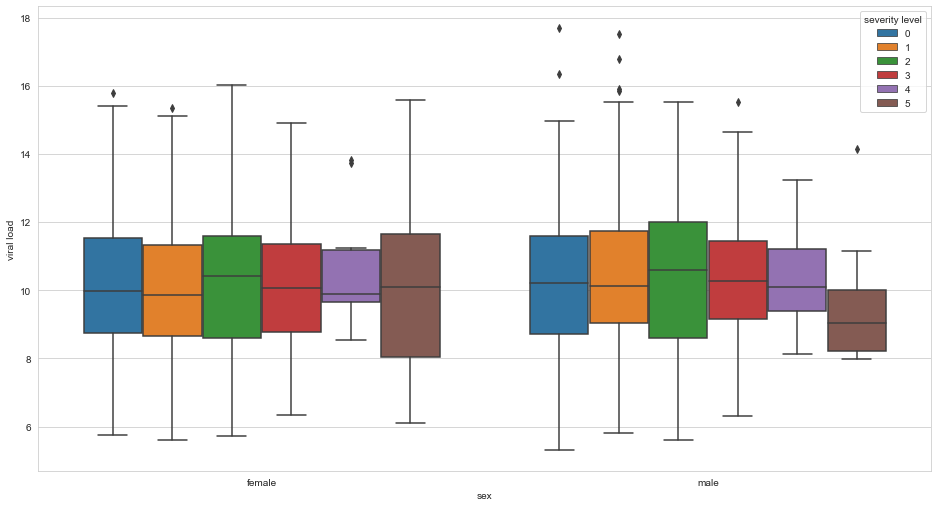

In [103]:
fig, axis = plt.subplots(figsize=(16, 6))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="sex", y='viral load', hue='severity level')

#### Observation:

From the above graph the viral load for females for severity levels 0, 1, and 2 doesn't seem to vary much.

#### Check assumption of normality and variance:

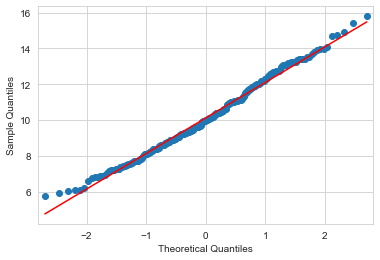

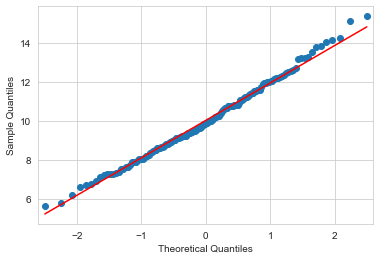

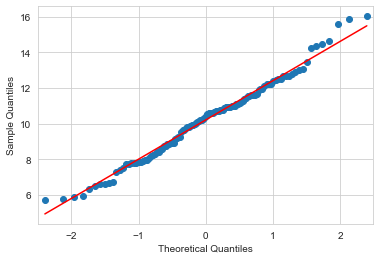

In [105]:
# create a Q-Q plot to check normality for viral load against severity level for females:
sm.qqplot(females0, line='s')
plt.show()

sm.qqplot(females1, line='s')
plt.show()

sm.qqplot(females2, line='s')
plt.show()

#### Observation

1. We can see the Q-Q plot does seem to fall along the straight line for all groups. Hence, the normality assumption criteria can said to be met.

#### Equality of Variance test:

In [106]:
levene_pvalue = levene(females0, females1, females2)
levene_pvalue

LeveneResult(statistic=0.9435131022565071, pvalue=0.38987253596513605)

#### Observation:
    
The p-value of levene's test is greater than alpha 0.05, so equal variance criteria can be said to met.

#### Selection of appropriate test:

##### F oneway anova test

In [107]:
# one-way anova test to determine the relation between the three groups
stats.f_oneway(females0, females1, females2)

F_onewayResult(statistic=0.3355061434584082, pvalue=0.7151189650367746)

In [115]:
#calculate critical value for the ANOVA test

n=3 # number of groups being compared
dfn=n-1 ## degree of freedom for between group variation 
dfd=len(females0)+len(females1)+len(females2) # degree of freedom for within group variation

critical_value= f.ppf(0.95, dfn, dfd)
critical_value

3.011644221302432

#### Conclusion:

Since the f statistic(0.33) is less than the critical value(3.01) and p-value being more than 0.05, we fail to reject the null hypothesis. Hence, the viral load against severity level 0, 1, and 2 for females are statistically not different.

### Business Insights and Recommendations:


1. Smokers category(20%) is significantly less than non-smokers(80%). But, we can see see hospitalization charges for smokers is quite high than of non-smokers. Since smokers are more severely affected, Apollo can bring this as a awareness campaign for the masses that smoking is dangerous and one is more likely to be affected due to smoking habit.

2. We have most of the patients with severity 0(43%), severity 1(24%), severity 3(11%) and a very few percentage for severity 4(1.9%) and severity 5(1.3%) cases. That's a good sign that most of the patients are with severity 0 which means less hospitalization charges for the patients. Also, more severe patients can lead to more casualty and which would not be good for the image of hospital.

3. There is a bit of difference in hospitalizations charges for male and females with male hospitalizations charges are little higher. However, we have more outliers for females. Since male hospitalization charges are higher probably because they are more severely affected. Apollo can launch some health campaign for males.

4. Hospitalization charges seems to vary across regions for smokers a little more than for non-smokers. As we can see for smokers southeast region has slight higher hospitalization charges than other three regions whereas for non-smokers for all the regions charges are almost similar. But, we have also seen smokers is statistically not different than non-smokers across all regions. Hence, Apollo can see if the difference is statistically different for hospitalization charges and decide on any plan accordingly to reduce the effect of smoking in any particular region.

5. We can see hospitalization charges are more in the southeast region for both males and females. Second most hospitalization charges is northeast for both males and females. But the least charges is southwest for females but northwest for males. So, there seems to be some difference in hospitalization charges basis region. Apollo can research the region of lower hospital charges, is there because of less patients or less facility of hospitals.

6. Severity level only seems to have little effect on hospitalization charges as there are little variation found among different severity levels. 

7. We can see hospitalization charges for male on the basis of severity level is higher. As we can see severity level 2 and 3 have more hospitalization charges for males. Apollo can do reaserach on why severity 2 and 3 have more hospitalization charges. Why is it making more expenses in hospitalization charges for those severity level. 

8. For smokers severity level 2 has highest hospitalization charges and for nonsmokers severity level 4 is with highest hospitalization charges. Smokers are more prone to catch this disease, and even with low severity level they have contributed more than non smokers.

9. For viral load, not much difference between men and women. There are little more outliers for males than females. Viral load doesn't seem to affect hospitalization charges. Also, the correlation between them is also not very high. Apollo can include some more metric which can cause hospitalization charges.

10. For smokers viral load seems to vary more according to the severity level than non-smokers. For severity level 2 smokers seems to have distinctively higher viral load. 

11. Males and females patient both have almost same age category. Also, across region we do not have much variation in age of the patients.

12. Smokers patients are relatively little young than non-smoker patients. Apollo can target youth awareness capaign for taking care of their health and not fall prey to habits such as smoking.

13. Viral load among males and females is not different. 

14. We can say the smokers does not vary across regions. Smokers do not vary across regions statitically is a good sign, as Apollo doesn't need to focus on one particular region. They can spread the awareness capaign with similar template across region.

15.  The viral load against severity level 0, 1, and 2 for females are statistically not different. Although, viral load against severity level 4 and 5 seems to differ for both males and females. 

16. Viral load and severity level are less of a factor towards hospitalization charges in comparison to smoking.